In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

In [2]:
def matmuls(layers_file, discard_ratio, device="cpu"):
    """ Performs attention rollout either on gpu or cpu """
    with open(layers_file, "rb") as f:
        A = torch.tensor(np.load(f)).float().to(device)
        I = torch.eye(len(A), dtype=torch.float).to(device)

        result = I.clone()
        while True:
            threshold = torch.quantile(A, discard_ratio)
            A[A < threshold] = 0
            A /= torch.sum(A)
            A = 0.5 * A + 0.5 * I
            result = torch.matmul(A, result)

            try:
                A = torch.tensor(np.load(f)).float().to(device)
            except:
                break
    
    clip = torch.quantile(result, 0.8)
    result[result > clip] = clip

    return result.detach().numpy()

In [3]:
def deit_display(im, result):
    plt.imshow(im, cmap="gray", extent=(0, 1, 1, 0))
    l = int((result.shape[1] - 1) ** 0.5)
    plt.imshow(result[0, 1:].reshape((l,l)), cmap="inferno", alpha=0.8, extent=(0, 1, 1, 0))
    plt.show()

In [4]:
path = "/home/vincent/Documenten/BachelorsProject/qualitative/"

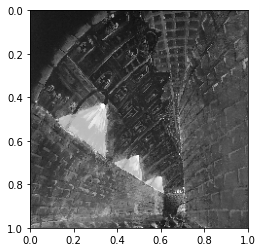

DOING OTS:


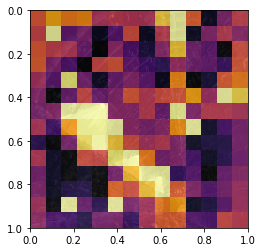

DOING FT:


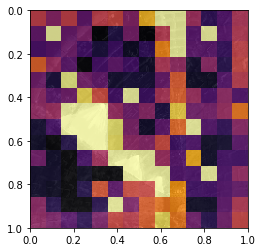

In [5]:
# Doing rollout for deit models:

img = 19
while True: # Just going on until it breaks :-p
    gray = path + f"img{img:03}_gray.npy"
    try:
        im = np.load(gray)
    except:
        break

    plt.imshow(im, cmap="gray", extent=(0, 1, 1, 0))
    plt.show()

    for method in ["ots", "ft"]:
        print("DOING " + method.upper() + ":")
        layers = path + "deit_" + method + f"_img{img:03}_layers.npy"
        result = matmuls(layers, 0.6)
        deit_display(im, result)
        np.save(os.path.join(path, f"deit_{method}_img{img:03}_saliency"), result)
    # input("press any key to continue...")
    # clear_output(wait=True)
    img += 1